# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
print(penguins_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB
None


In [2]:
# Drop missing values and re-examine dataset
penguins_df_dropna = penguins_df.dropna()
print(penguins_df_dropna.info(), '\n', penguins_df_dropna.describe())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB
None 
        culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        335.000000       335.000000         335.000000   335.000000
mean          43.988358        17.169552         214.355224  4209.179104
std            5.453430         1.971966         263.253508   803.633495
min           32.100000        13.100000        -132.000000  2700.000000
25%           39.500000        15.600000         190.000000  3550.000000
50%           44.500000        17.300000         197.000000  4

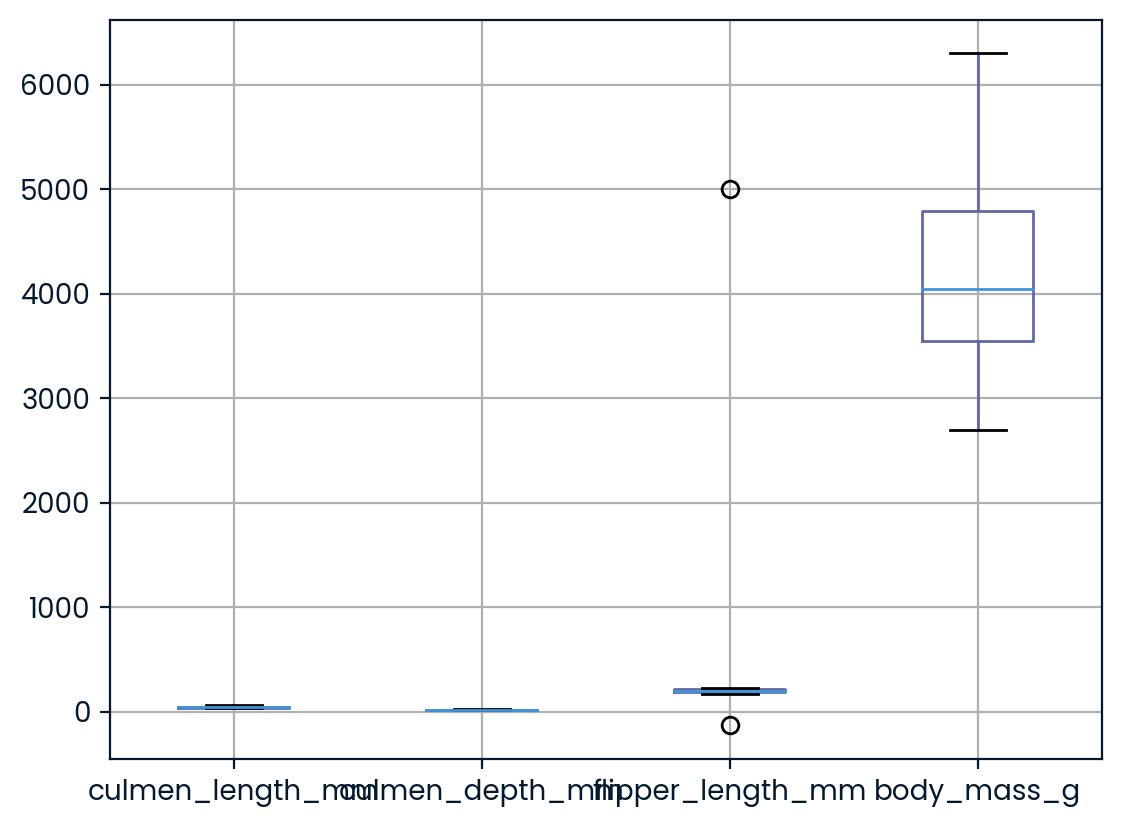

In [3]:
# Draw a box plot to check outliers
penguins_df_dropna.boxplot()
plt.show()

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        333.000000       333.000000         333.000000   333.000000
mean          44.022523        17.148649         201.024024  4208.483483
std            5.444308         1.958940          14.042299   805.978992
min           32.100000        13.100000         172.000000  2700.000000
25%           39.500000        15.600000         190.000000  3550.000000
50%           44.500000        17.300000         197.000000  4050.000000
75%           48.600000        18.700000         213.000000  4800.000000
max           59.600000        21.500000         231.000000  6300.000000


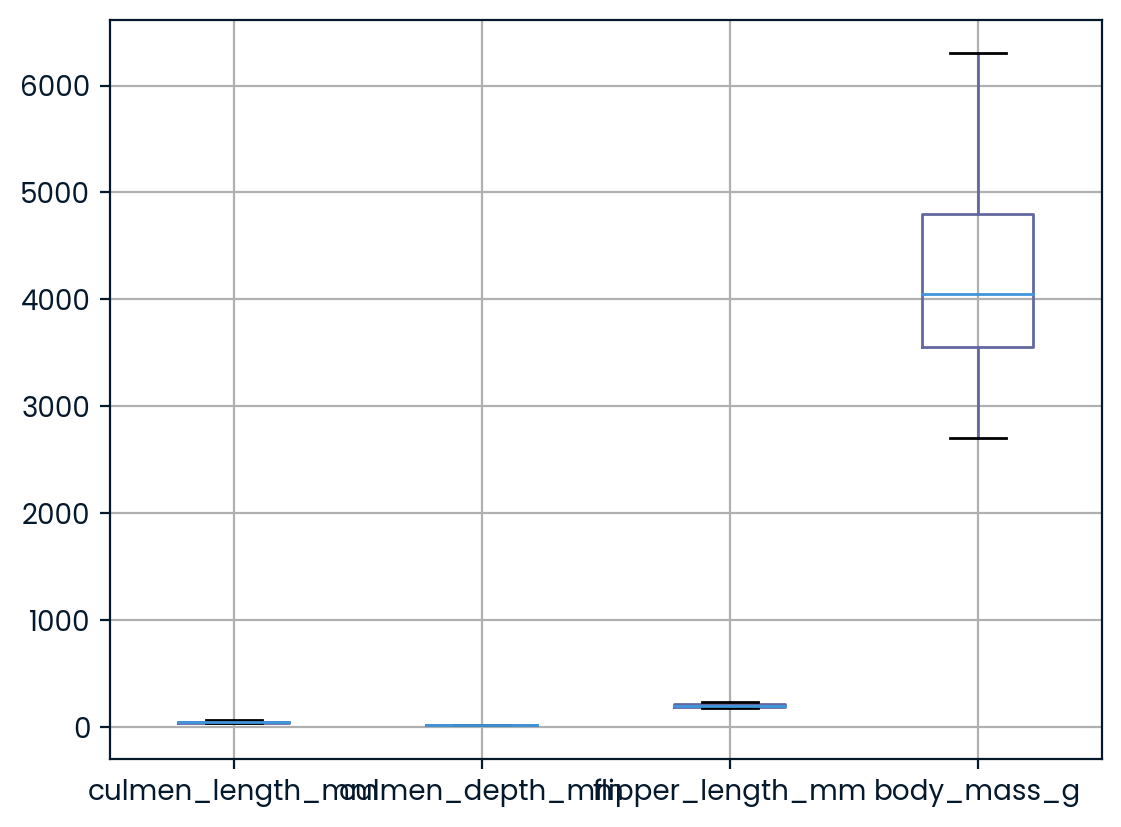

In [4]:
# Remove outliers from the dataset
penguins_clean = penguins_df_dropna.drop([9,14])
print(penguins_clean.describe())
penguins_clean.boxplot()
plt.show()

In [5]:
# Create dummies for categorical variable
df = pd.get_dummies(penguins_clean)
df = df.drop(['sex_.'], axis=1)
print(df)

     culmen_length_mm  culmen_depth_mm  ...  sex_FEMALE  sex_MALE
0                39.1             18.7  ...           0         1
1                39.5             17.4  ...           1         0
2                40.3             18.0  ...           1         0
4                36.7             19.3  ...           1         0
5                39.3             20.6  ...           0         1
..                ...              ...  ...         ...       ...
338              47.2             13.7  ...           1         0
340              46.8             14.3  ...           1         0
341              50.4             15.7  ...           0         1
342              45.2             14.8  ...           1         0
343              49.9             16.1  ...           0         1

[333 rows x 6 columns]


In [6]:
# Preprocess data
# Initialize StandardScaler
scaler = StandardScaler()
penguins_preprocessed = scaler.fit_transform(df)

In [7]:
# Perform PCA
pca = PCA()
pca.fit(penguins_preprocessed)
pca.explained_variance_ratio_

n_components = pca.explained_variance_ratio_[pca.explained_variance_ratio_ > 0.1]
print(n_components)

[0.51973484 0.34424041]


In [8]:
# Re-perform PCA with 2 components
pca_2nd = PCA(n_components=len(n_components))
penguins_PCA = pca.fit_transform(penguins_preprocessed)

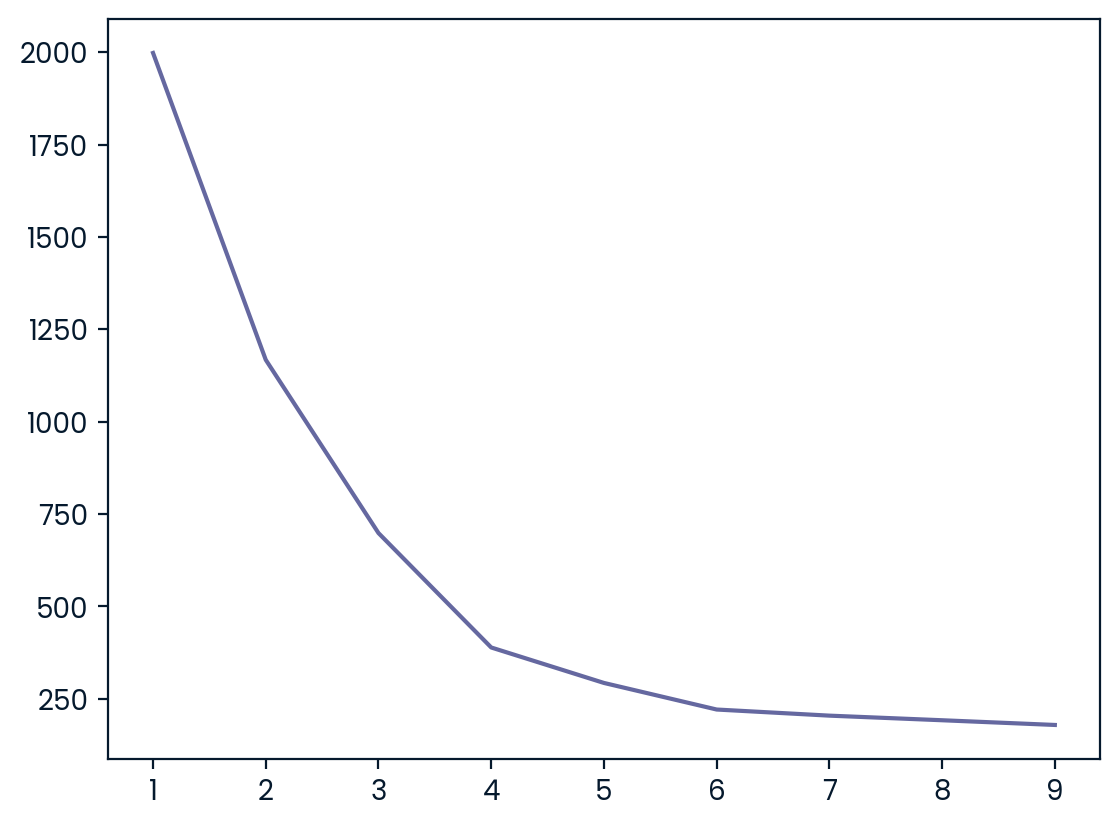

In [9]:
# Elbow analysis
inertia = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,10), inertia)
plt.show()

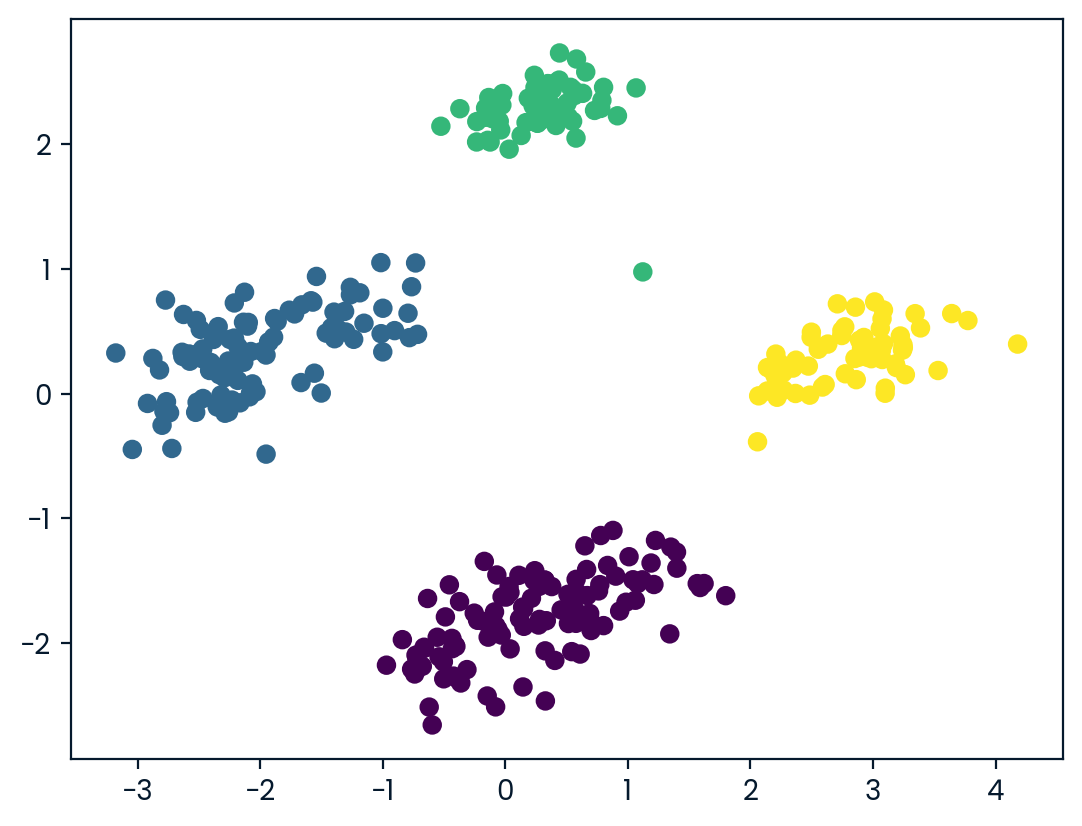

In [10]:
# Optimal number of clusters
n_clusters = 4

kmeans_2nd = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)

# Visualize
plt.scatter(penguins_PCA[:,0], penguins_PCA[:,1], c=kmeans_2nd.labels_)
plt.show()

In [11]:
# Final characteristic table
df['label'] = kmeans_2nd.labels_
numeric_columns = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].columns
stat_penguins = df.groupby('label')[numeric_columns].mean()
print(stat_penguins)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
label                                                                   
0             43.878302        19.111321         194.764151  4006.603774
1             40.217757        17.611215         189.046729  3419.158879
2             45.545763        14.262712         212.779661  4683.050847
3             49.473770        15.718033         221.540984  5484.836066


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


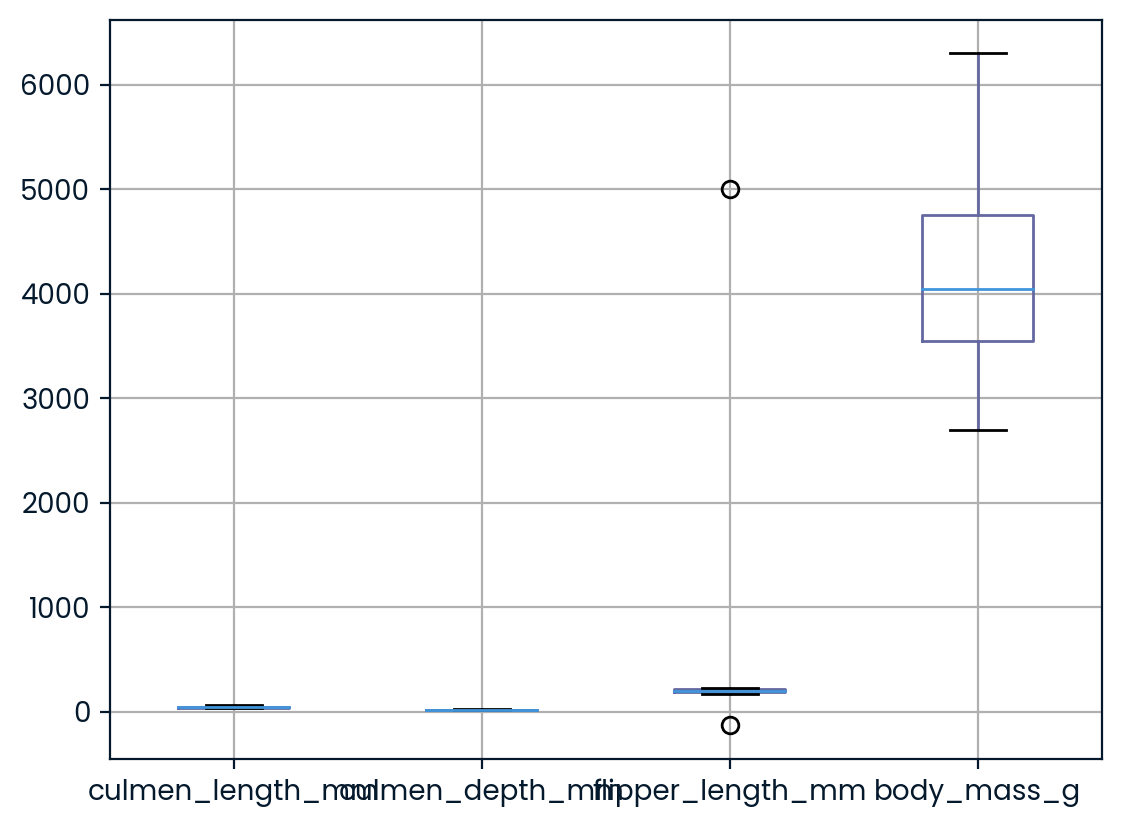

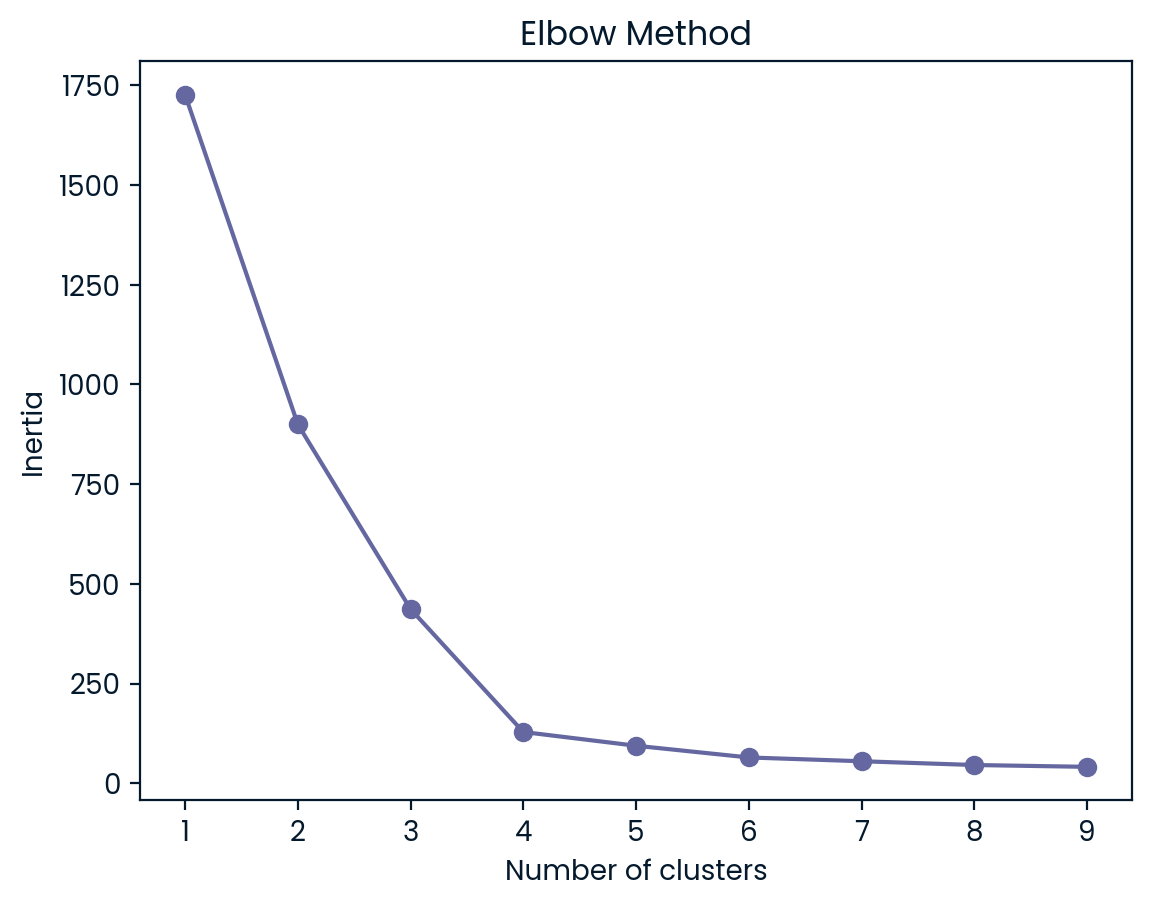

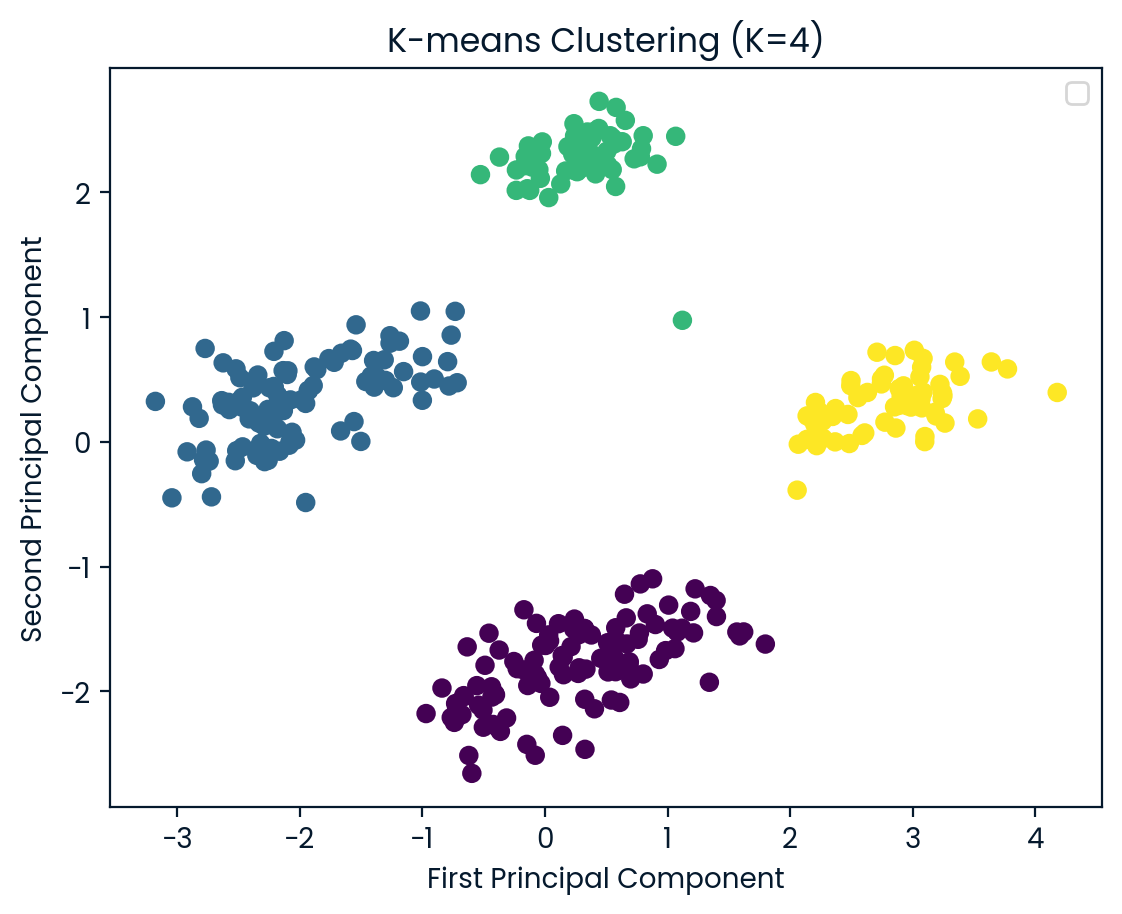

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,45.545763,14.262712,212.779661
3,49.473770,15.718033,221.540984


In [12]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1 - Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
penguins_df.head()
penguins_df.info()

# Step 2 - Dealing with null values and outliers
penguins_df.boxplot()  
plt.show()

penguins_clean = penguins_df.dropna()
penguins_clean[penguins_clean['flipper_length_mm']>4000]
penguins_clean[penguins_clean['flipper_length_mm']<0]
penguins_clean = penguins_clean.drop([9,14])

# Step 3 - Perform preprocessing steps on the dataset to create dummy variables
df = pd.get_dummies(penguins_clean).drop('sex_.',axis=1)

# Step 4 - Perform preprocessing steps on the dataset - scaling
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X,columns=df.columns)
penguins_preprocessed.head(10)

# Step 5 - Perform PCA
pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_
n_components=sum(dfx_pca.explained_variance_ratio_>0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

# Step 6 - Detect the optimal number of clusters for k-means clustering
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()
n_clusters=4

# Step 7 - Run the k-means clustering algorithm
# with the optimal number of clusters 
# and visualize the resulting clusters.
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

# Step 8 - Create a final statistical DataFrame for each cluster.
penguins_clean['label'] = kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()
stat_penguins